# Advent of Code #


In [1]:
# set up the environment
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt


## Day 12: Passage Pathing ##

With your submarine's subterranean subsystems subsisting suboptimally, the only way you're getting out of this cave anytime soon is by finding a path yourself. Not just **a** path ,  the only way to know if you've found the **best** path is to find all of them.

Fortunately, the sensors are still mostly working, and so you build a rough map of the remaining caves (your puzzle input). For example:
```
start-A
start-b
A-c
A-b
b-d
A-end
b-end
```
This is a list of how all of the caves are connected. You start in the cave named start, and your destination is the cave named end. An entry like b-d means that cave b is connected to cave d - that is, you can move between them.

So, the above cave system looks roughly like this:
```
    start
    /   \
c--A-----b--d
    \   /
     end
```
Your goal is to find the number of distinct **paths** that start at start, end at end, and don't visit small caves more than once. There are two types of caves: **big** caves (written in uppercase, like A) and **small** caves (written in lowercase, like b). It would be a waste of time to visit any small cave more than once, but big caves are large enough that it might be worth visiting them multiple times. So, all paths you find should **visit small caves at most once**, and can **visit big caves any number of times.**

Given these rules, there are **10** paths through this example cave system:
```
start,A,b,A,c,A,end
start,A,b,A,end
start,A,b,end
start,A,c,A,b,A,end
start,A,c,A,b,end
start,A,c,A,end
start,A,end
start,b,A,c,A,end
start,b,A,end
start,b,end
```
(Each line in the above list corresponds to a single path; the caves visited by that path are listed in the order they are visited and separated by commas.)

Note that in this cave system, cave d is never visited by any path: to do so, cave b would need to be visited twice (once on the way to cave d and a second time when returning from cave d), and since cave b is small, this is not allowed.

Here is a slightly larger example:
```
dc-end
HN-start
start-kj
dc-start
dc-HN
LN-dc
HN-end
kj-sa
kj-HN
kj-dc
```
The 19 paths through it are as follows:
```
start,HN,dc,HN,end
start,HN,dc,HN,kj,HN,end
start,HN,dc,end
start,HN,dc,kj,HN,end
start,HN,end
start,HN,kj,HN,dc,HN,end
start,HN,kj,HN,dc,end
start,HN,kj,HN,end
start,HN,kj,dc,HN,end
start,HN,kj,dc,end
start,dc,HN,end
start,dc,HN,kj,HN,end
start,dc,end
start,dc,kj,HN,end
start,kj,HN,dc,HN,end
start,kj,HN,dc,end
start,kj,HN,end
start,kj,dc,HN,end
start,kj,dc,end
```
Finally, this even larger example has 226 paths through it:
```
fs-end
he-DX
fs-he
start-DX
pj-DX
end-zg
zg-sl
zg-pj
pj-he
RW-he
fs-DX
pj-RW
zg-RW
start-pj
he-WI
zg-he
pj-fs
start-RW
```
**How many paths through this cave system are there that visit small caves at most once?**

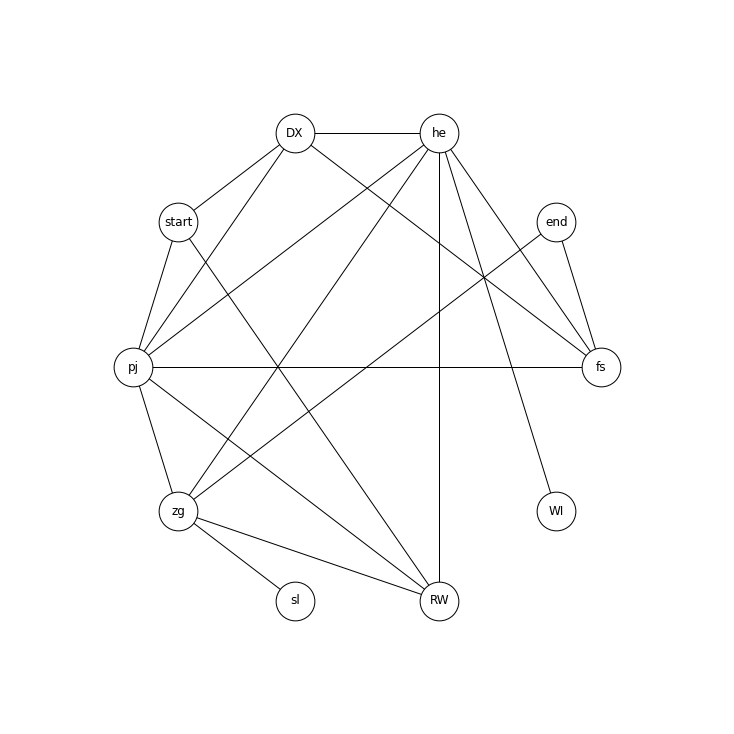

In [5]:
with open("data/cave_system.dat") as file:
    cave_map = file.read().splitlines()
cave_edges = np.genfromtxt("data/cave_system.dat", dtype=str, delimiter='-')

test_edges = np.array(['fs', 'end', 'he','DX', 'fs', 'he', 'start', 'DX', 'pj', 'DX', 'end', 
                'zg', 'zg', 'sl', 'zg', 'pj', 'pj', 'he', 'RW', 'he', 'fs', 'DX', 
                'pj', 'RW', 'zg', 'RW', 'start', 'pj', 'he', 'WI', 'zg', 'he', 'pj', 'fs', 'start', 'RW']).reshape((18,2))

problem_edges = test_edges.copy()
for x in problem_edges:
    if x[0] == 'end':
        x[0] = x[1]
        x[1] = 'end'
    


# Create a graph then draw it
G = nx.Graph()
G.add_edges_from(problem_edges)

# pos = {'start': (4,4), 'end': (4,0), 'fs':(5, 2), 'he':(4,2), 'DX': (5, 3), 'pj': (2, 4), 'zg':(3,1), 'sl':(2,1), 'RW':(3,2), 'WI':(4,1)}

options = {
    "with_labels": True,
    "font_size": 12,
    "node_size": 1500,
    "node_color": "white",
    "edgecolors": "black",
#    "linewidths": 5,
#    "width": 5,
}
nx.draw_circular(G, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.axis("off")
plt.show()


In [16]:
c = nx.coloring.equitable_color(G, num_colors=7)
colored_paths = nx.algorithms.coloring.strategy_connected_sequential(G, c, traversal='bfs')
print(colored_paths)
for x in colored_paths:
    print(x)

<generator object strategy_connected_sequential at 0x7faacc46d820>
RW
he
pj
zg
start
DX
fs
WI
end
sl
